In [1]:
from underlying import Underlying
from option import Option
from trader import Trader

import matplotlib.pyplot as plt
from tqdm import tqdm
from quantile_hedging_calculator import *
import numpy as np
import pandas as pd

In [2]:
def payoff_call(X, K):
    return np.maximum(X.iloc[:,-1]- K, 0)
def payoff_put(X, K):
    return np.maximum(K - X.iloc[:,-1], 0)

In [3]:
mu = 0.06
sigma =  0.1
r = 0.05
T = 1
X0 = 100
repeat = 1000

## Full hedging - Vanilla Call

In [4]:
K = 80

In [5]:
underlying = Underlying(mu, sigma, r, 250)

In [6]:
_, reality = underlying.simulate_P(repeat, T)

In [7]:
vanilla_call = Option(underlying, lambda X: payoff_call(X, K), T)

In [8]:
BS_price_call = vanilla_call.get_MC_price(X0, 0, method = 'var_control')
BS_price_call

23.907837840861916

In [9]:
money_time_call = pd.DataFrame(np.zeros(reality.shape))
delta_time_call = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = BS_price_call)
    money, delta, _ = trader.simulate_hedging(vanilla_call, X0*reality.iloc[[i],:], update_freq = 1)
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta

100%|███████████████████████████████████████| 1000/1000 [10:00<00:00,  1.67it/s]


<AxesSubplot:>

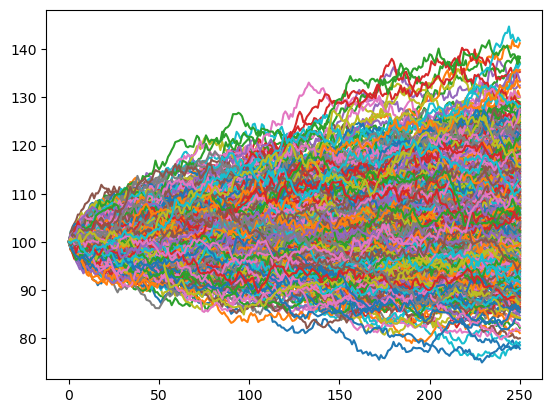

In [10]:
(X0*reality).T.plot(legend = False)

<AxesSubplot:>

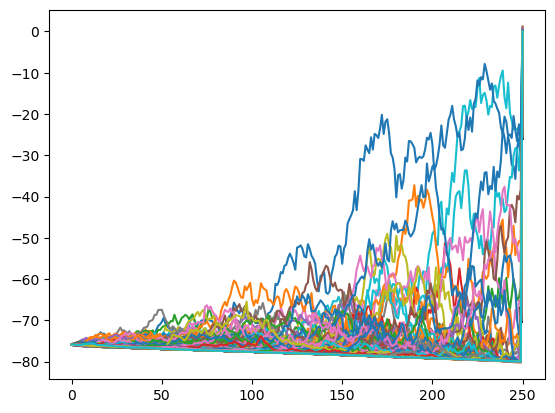

In [11]:
(money_time_call).T.plot(legend = False)

<AxesSubplot:>

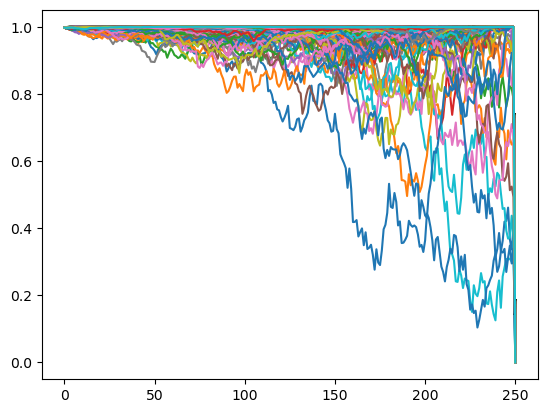

In [12]:
(delta_time_call).T.plot(legend = False)

(array([  1.,   8., 946.,  34.,   1.,   1.,   1.,   0.,   1.,   2.,   0.,
          1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.20690814, -0.13612577, -0.06534341,  0.00543896,  0.07622132,
         0.14700369,  0.21778605,  0.28856842,  0.35935078,  0.43013315,
         0.50091552,  0.57169788,  0.64248025,  0.71326261,  0.78404498,
         0.85482734,  0.92560971,  0.99639207,  1.06717444,  1.1379568 ,
         1.20873917]),
 <BarContainer object of 20 artists>)

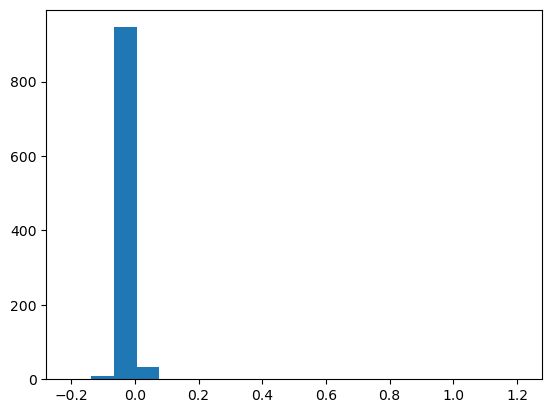

In [13]:
plt.hist(money_time_call.iloc[:,-1], bins = 20)

## Full hedging - Vanilla Put

In [9]:
K = 120

In [10]:
underlying = Underlying(mu, sigma, r, 250)

In [11]:
_, reality = underlying.simulate_P(repeat, T)

In [12]:
vanilla_put = Option(underlying, lambda X: payoff_put(X, K), T)

In [13]:
BS_price_put = vanilla_put.get_MC_price(X0, 0, method = 'var_control')
BS_price_put

14.610293428699633

In [19]:
money_time_put = pd.DataFrame(np.zeros(reality.shape))
delta_time_put = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = BS_price_put)
    money, delta, _ = trader.simulate_hedging(vanilla_put, X0*reality.iloc[[i],:], update_freq = 1)
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta

100%|███████████████████████████████████████| 1000/1000 [09:42<00:00,  1.72it/s]


<AxesSubplot:>

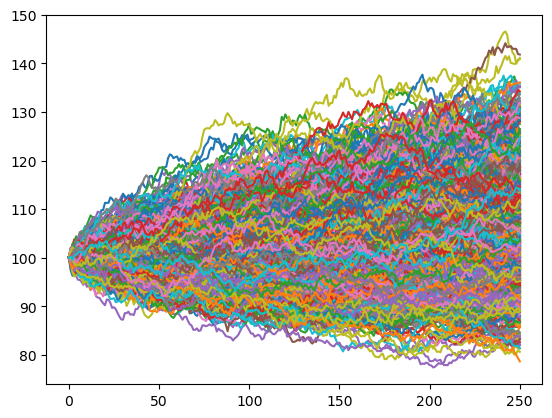

In [20]:
(X0*reality).T.plot(legend = False)

<AxesSubplot:>

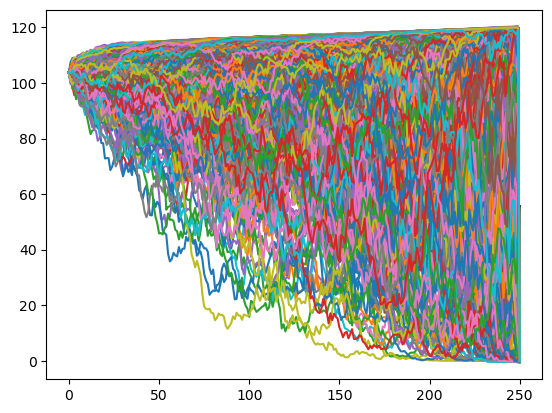

In [21]:
(money_time_put).T.plot(legend = False)

<AxesSubplot:>

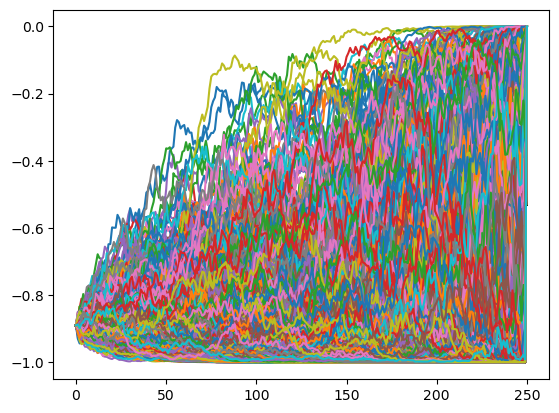

In [22]:
(delta_time_put).T.plot(legend = False)

(array([  3.,   5.,  14.,  40., 137., 488., 161.,  53.,  15.,   9.,  16.,
         13.,  15.,   5.,   5.,   5.,   6.,   7.,   1.,   2.]),
 array([-0.62601359, -0.52324051, -0.42046743, -0.31769434, -0.21492126,
        -0.11214818, -0.00937509,  0.09339799,  0.19617107,  0.29894416,
         0.40171724,  0.50449032,  0.6072634 ,  0.71003649,  0.81280957,
         0.91558265,  1.01835574,  1.12112882,  1.2239019 ,  1.32667499,
         1.42944807]),
 <BarContainer object of 20 artists>)

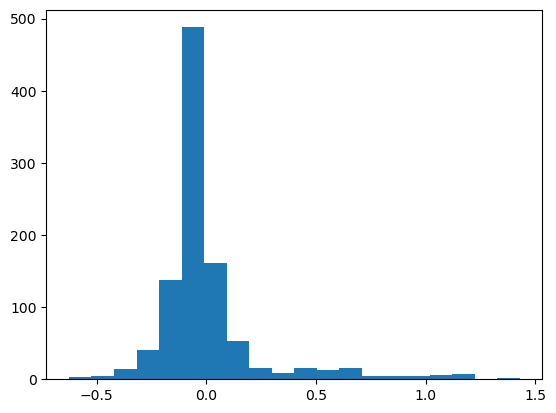

In [23]:
plt.hist(money_time_put.iloc[:,-1], bins = 20)

## Quantile hedging with half of required initial capital- Vanilla Call

In [14]:
K = 80

In [15]:
underlying = Underlying(mu, sigma, r, 250)

In [16]:
_, reality = underlying.simulate_P(repeat, T)

In [27]:
money_time_call = pd.DataFrame(np.zeros(reality.shape))
delta_time_call = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = BS_price_call/2)
    money, delta, success_prob = trader.simulate_hedging(vanilla_call, X0*reality.iloc[[i],:], update_freq = 1, limited_capital = True)
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta
print(f'Success probability with initial capital={BS_price_call/2:.2f} is: {success_prob}')

100%|███████████████████████████████████████| 1000/1000 [59:52<00:00,  3.59s/it]

Success probability with initial capital=11.95 is: 0.49733932715502915


<AxesSubplot:>

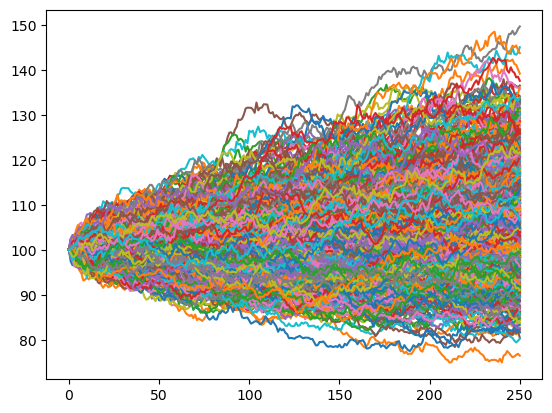

In [28]:
(X0*reality).T.plot(legend = False)

<AxesSubplot:>

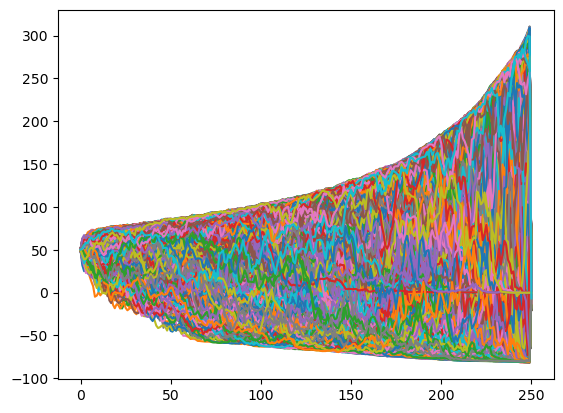

In [29]:
(money_time_call).T.plot(legend = False)

<AxesSubplot:>

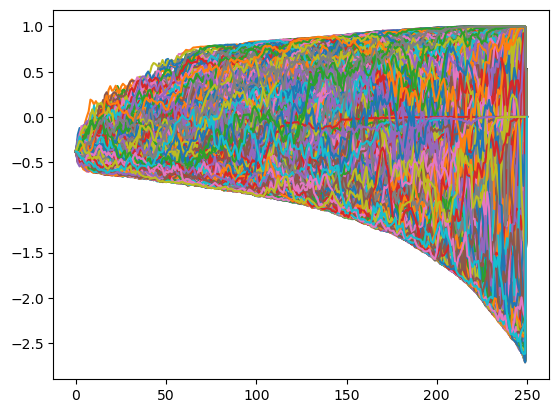

In [30]:
(delta_time_call).T.plot(legend = False)

(array([  8.,  18.,  19.,  23.,  14.,  17.,  19.,  17.,  31., 100., 534.,
         62.,  20.,  21.,  17.,  12.,  24.,  16.,  15.,  13.]),
 array([-15.75007723, -14.22093692, -12.69179661, -11.1626563 ,
         -9.63351599,  -8.10437568,  -6.57523537,  -5.04609506,
         -3.51695475,  -1.98781444,  -0.45867413,   1.07046618,
          2.59960649,   4.1287468 ,   5.65788711,   7.18702742,
          8.71616773,  10.24530804,  11.77444835,  13.30358866,
         14.83272897]),
 <BarContainer object of 20 artists>)

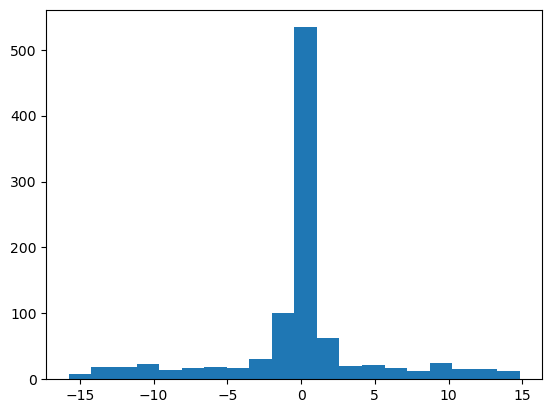

In [31]:
plt.hist(money_time_call.iloc[:,-1], bins = 20)

In [52]:
print(f'Empiric success probability with initial capital={BS_price_call/2:.2f} is: {(abs(money_time_call.iloc[:,-1]) <= 0.5).mean()}')

Empiric success probability with initial capital=11.95 is: 0.386


## Quantile hedging with half of required initial capital- Vanilla Put

In [17]:
K = 120

In [18]:
underlying = Underlying(mu, sigma, r, 250)

In [19]:
_, reality = underlying.simulate_P(repeat, T)

In [36]:
money_time_put = pd.DataFrame(np.zeros(reality.shape))
delta_time_put = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = BS_price_put/2)
    money, delta, success_prob = trader.simulate_hedging(vanilla_put, X0*reality.iloc[[i],:], update_freq = 1, limited_capital = True)
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta
print(f'Success probability with initial capital={BS_price_put/2:.2f} is: {success_prob}')

100%|█████████████████████████████████████| 1000/1000 [3:27:22<00:00, 12.44s/it]

Success probability with initial capital=7.31 is: 0.5014418167549618


<AxesSubplot:>

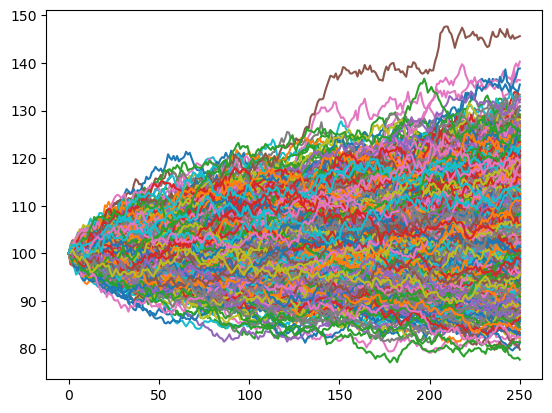

In [37]:
(X0*reality).T.plot(legend = False)

<AxesSubplot:>

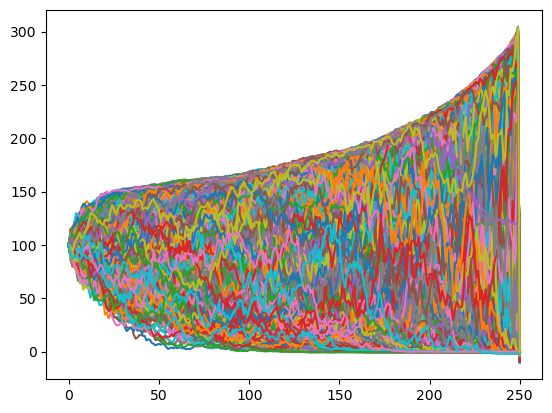

In [38]:
(money_time_put).T.plot(legend = False)

<AxesSubplot:>

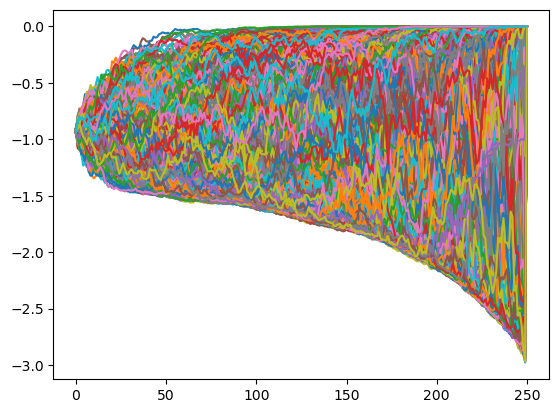

In [39]:
(delta_time_put).T.plot(legend = False)

(array([ 11.,  21.,  21.,  19.,  20.,  18.,  14.,  36., 406., 267.,  24.,
         14.,  21.,  19.,  16.,  16.,  16.,  18.,  14.,   9.]),
 array([-10.27774227,  -9.1520431 ,  -8.02634394,  -6.90064477,
         -5.77494561,  -4.64924644,  -3.52354728,  -2.39784811,
         -1.27214894,  -0.14644978,   0.97924939,   2.10494855,
          3.23064772,   4.35634688,   5.48204605,   6.60774522,
          7.73344438,   8.85914355,   9.98484271,  11.11054188,
         12.23624104]),
 <BarContainer object of 20 artists>)

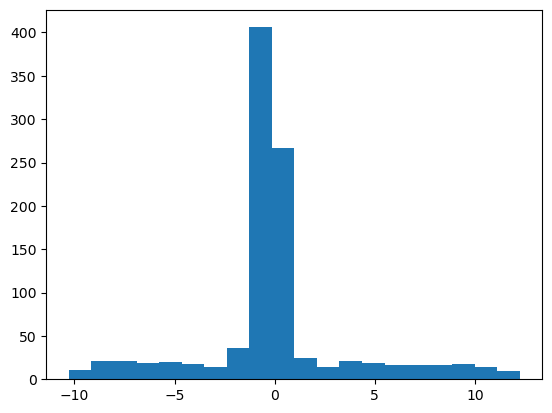

In [40]:
plt.hist(money_time_put.iloc[:,-1], bins = 20)

In [51]:
print(f'Empiric success probability with initial capital={BS_price_put/2:.2f} is: {(abs(money_time_put.iloc[:,-1]) <= 0.5).mean():.2f}')

Empiric success probability with initial capital=7.31 is: 0.45


## Tests on modified payoff properties

### Vanilla call

In [20]:
K = 80
vanilla_call = Option(underlying, lambda X: payoff_call(X, K), T)

In [21]:
payoff_func_v0, success_prob = payoff_from_v0(vanilla_call, BS_price_call/2, X0)
print(f'Success prob for V0={BS_price_call/2:.2f}: {success_prob:.2f}')
payoff_func_prob, success_V0 = payoff_from_prob(vanilla_call, success_prob, X0)
print(f'Proper V0 for success prob={success_prob}: {success_V0:.2f}')

Success prob for V0=11.95: 0.62
Proper V0 for success prob=0.6201: 12.05


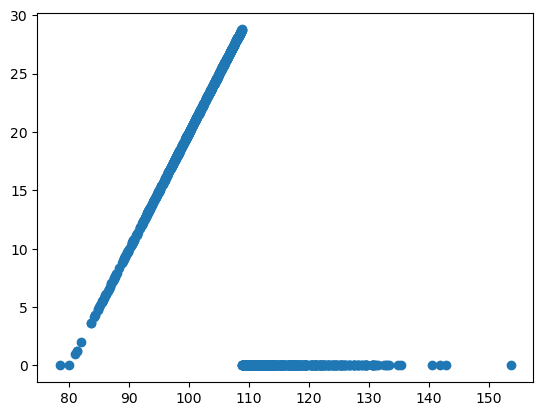

In [22]:
plt.scatter(X0*reality.iloc[:,-1], payoff_func_v0(X0*reality))

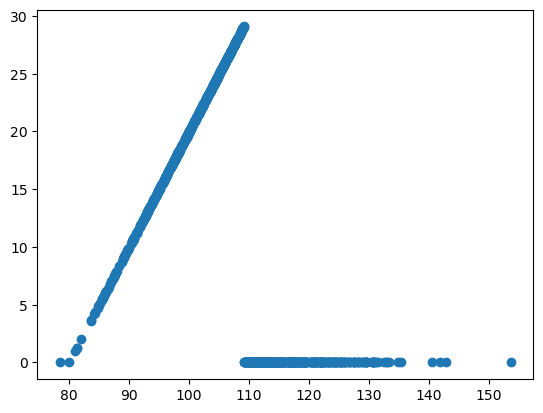

In [23]:
plt.scatter(X0*reality.iloc[:,-1], payoff_func_prob(X0*reality))

### Vanilla put

In [24]:
K = 120
vanilla_put = Option(underlying, lambda X: payoff_put(X, K), T)

In [25]:
payoff_func_v0, success_prob = payoff_from_v0(vanilla_put, BS_price_put/2, X0)
print(f'Success prob for V0={BS_price_put/2:.2f}: {success_prob:.2f}')
payoff_func_prob, success_V0 = payoff_from_prob(vanilla_put, success_prob, X0)
print(f'Proper V0 for success prob={success_prob}: {success_V0:.2f}')

Success prob for V0=7.31: 0.25
Proper V0 for success prob=0.2528: 7.34


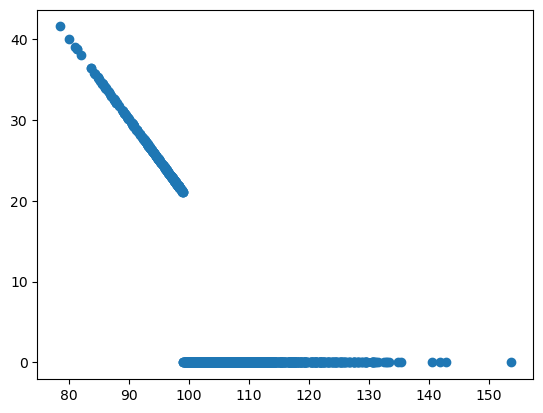

In [26]:
plt.scatter(X0*reality.iloc[:,-1], payoff_func_v0(X0*reality))

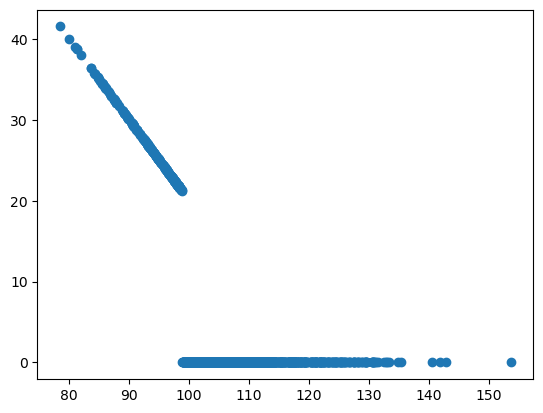

In [27]:
plt.scatter(X0*reality.iloc[:,-1], payoff_func_prob(X0*reality))

## Sensivity analysis on initial capital/BS_price vs success probability

### Vanilla call

In [34]:
K = 80
vanilla_call = Option(underlying, lambda X: payoff_call(X, K), T)

100%|███████████████████████████████████████████| 85/85 [00:11<00:00,  7.29it/s]


Text(0, 0.5, 'success probability')

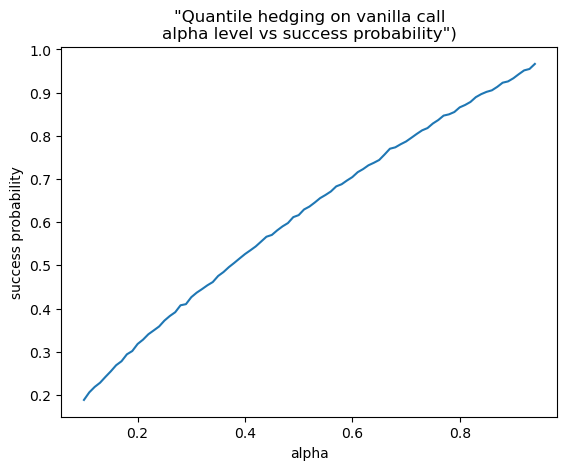

In [35]:
alphas = np.arange(10,95,1)/100
probs = []
for a in tqdm(alphas):
    _, success_prob = payoff_from_v0(vanilla_call, a*BS_price_call, X0)
    probs.append(success_prob)
plt.plot(alphas, probs)
plt.title('"Quantile hedging on vanilla call\nalpha level vs success probability")')
plt.xlabel('alpha')
plt.ylabel('success probability')

### Vanilla put

In [36]:
K = 120
vanilla_put = Option(underlying, lambda X: payoff_put(X, K), T)

100%|███████████████████████████████████████████| 85/85 [00:11<00:00,  7.21it/s]


Text(0, 0.5, 'success probability')

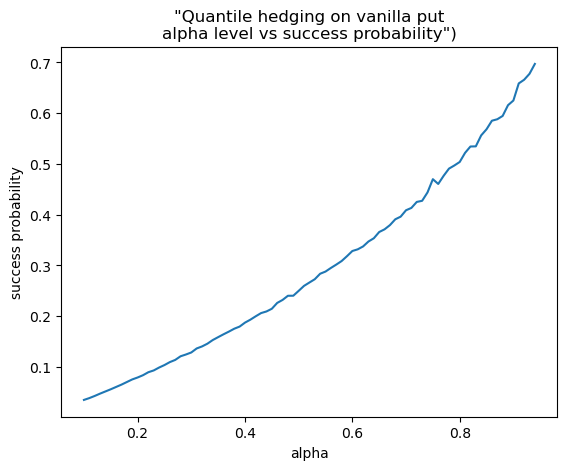

In [37]:
alphas = np.arange(10,95,1)/100
probs = []
for a in tqdm(alphas):
    _, success_prob = payoff_from_v0(vanilla_put, a*BS_price_put, X0)
    probs.append(success_prob)
plt.plot(alphas, probs)
plt.title('"Quantile hedging on vanilla put\nalpha level vs success probability")')
plt.xlabel('alpha')
plt.ylabel('success probability')